In [15]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [16]:
os.listdir('stats')

['deepseek.txt', 'gemma3.txt', 'llama.txt']

In [17]:
df = {}
for filename in os.listdir('stats'):
    #initialize data frame
    columns = ['total duration','load duration', 'prompt eval count', 'prompt eval duration','prompt eval rate','eval count','eval duration','eval rate']
    rows = []
    current_row = []
    with open(filename, 'r') as file:
        for line in file:
            pattern = r"\s(\d+m)?(\d+(\.?\d+)?)"
            result = re.search(pattern, line)
            if not result:
                continue
            result = result.groups()
            if result[0] != None:
                minutes = int(result[0][:-1])
                seconds = float(result[1])
                current_row.append(minutes*60 + seconds)
            else:
                current_row.append(float(result[1]))
            if len(current_row) == len(columns):
                rows.append(current_row)
                current_row = []
    #readlines, feed int othe reg expression, if there is mins, mult by 60 and add, then add that to the dataframe, if no mins, just add the secions into the dataframe
    filename = filename.split('.')[0]
    df[filename] = pd.DataFrame(rows, columns=columns)
print(df)


{'deepseek':     total duration  load duration  prompt eval count  prompt eval duration  \
0        52.174292       5.784189                9.0            412.626660   
1        41.265727      13.870002               31.0              1.497431   
2       209.968987      13.603952               33.0              1.610631   
3        93.305495      14.060707               25.0              1.231209   
4        43.460212      21.217541               17.0            842.117357   
5       162.745018      13.585457               15.0            733.407037   
6       101.878742      14.965472               14.0            692.177141   
7       174.145475      13.940480               12.0            588.933392   
8        65.116040      14.419202               18.0            902.759383   
9       123.450595      14.014099               10.0            490.495889   
10      319.679117      14.152983               50.0              2.516208   
11       72.338122      14.218967                8.

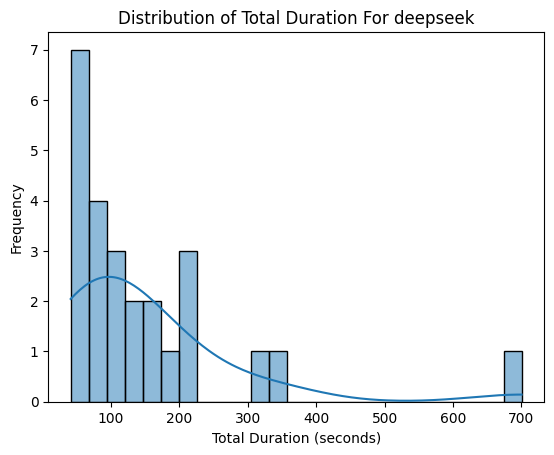

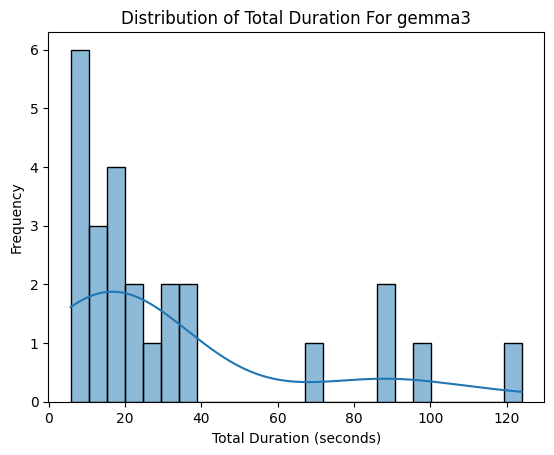

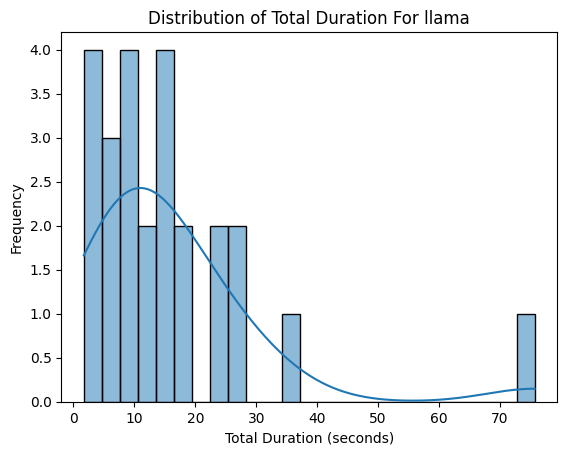

In [19]:
for key in df:

#Histogram of eval rate
    df[key]['total duration'] = pd.to_numeric(df[key]['total duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['total duration'], bins=25, kde=True)
    plt.title("Distribution of Total Duration For " + key)
    plt.xlabel("Total Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
#DO NOT RUN THIS, IT BREAKS EVERYTHING

# for name, df in df.items():
#     sns.scatterplot(data=df, x='prompt eval duration', y='prompt eval count')
#     plt.title(f'{name} - Prompt Eval Duration vs Count')
#     plt.tight_layout()
#     plt.show()

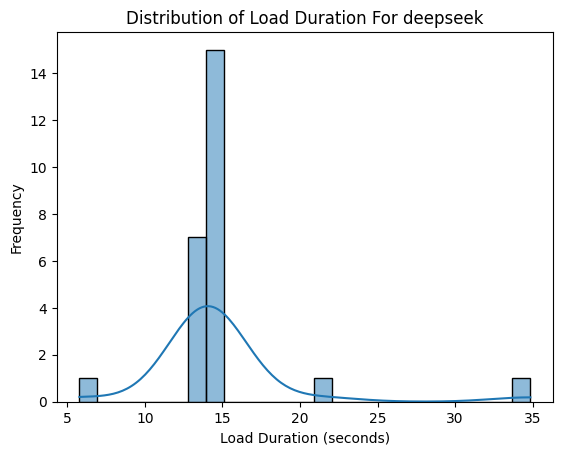

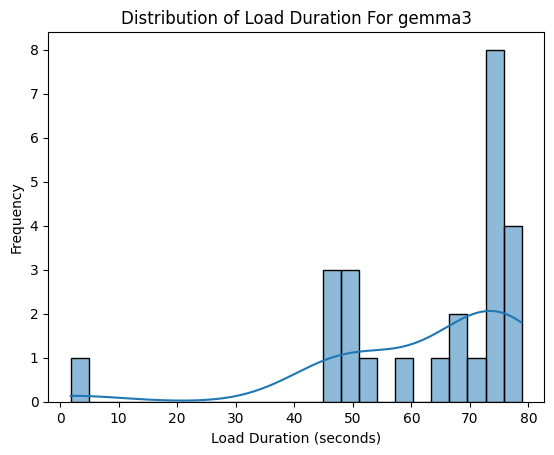

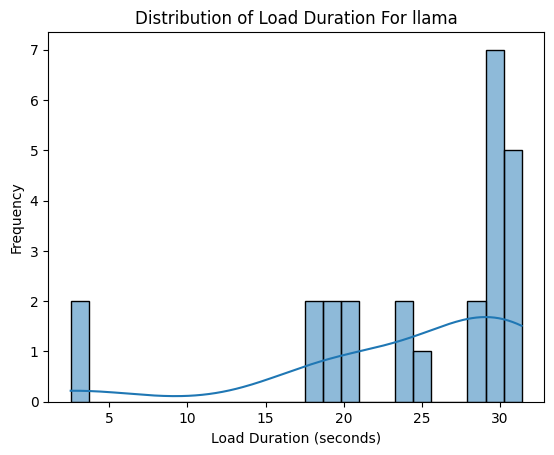

In [21]:
for key in df:

#Histogram of eval rate
    df[key]['load duration'] = pd.to_numeric(df[key]['load duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['load duration'], bins=25, kde=True)
    plt.title("Distribution of Load Duration For " + key)
    plt.xlabel("Load Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



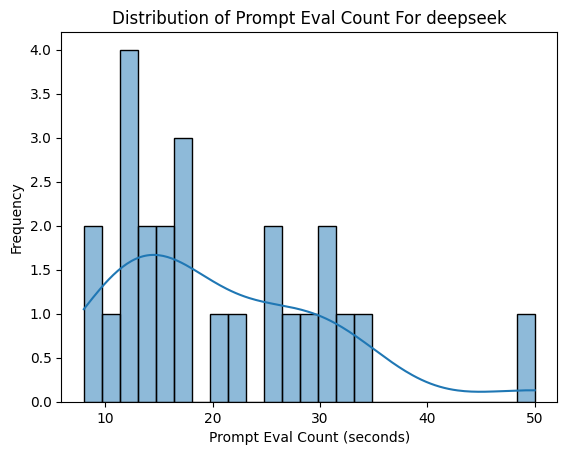

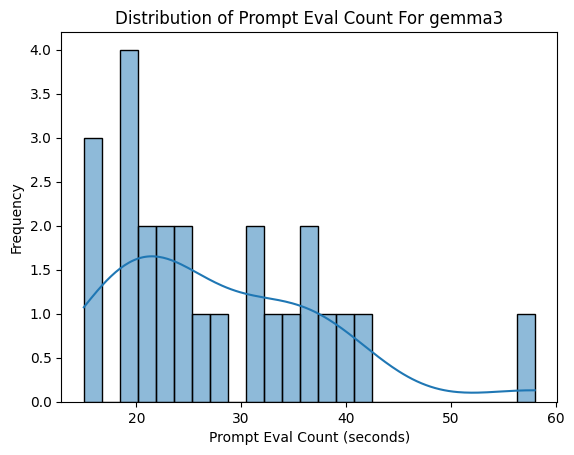

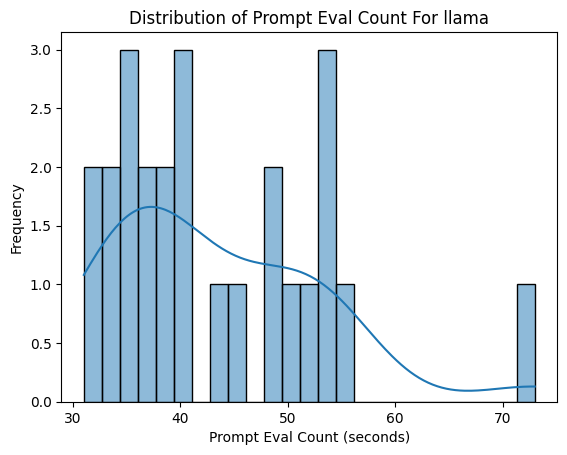

In [22]:
for key in df:

#Histogram of eval rate
    df[key]['prompt eval count'] = pd.to_numeric(df[key]['prompt eval count'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['prompt eval count'], bins=25, kde=True)
    plt.title("Distribution of Prompt Eval Count For " + key)
    plt.xlabel("Prompt Eval Count (seconds)")
    plt.ylabel("Frequency")
    plt.show()



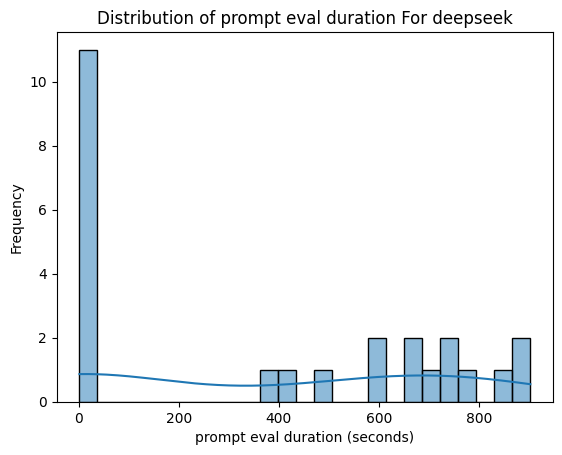

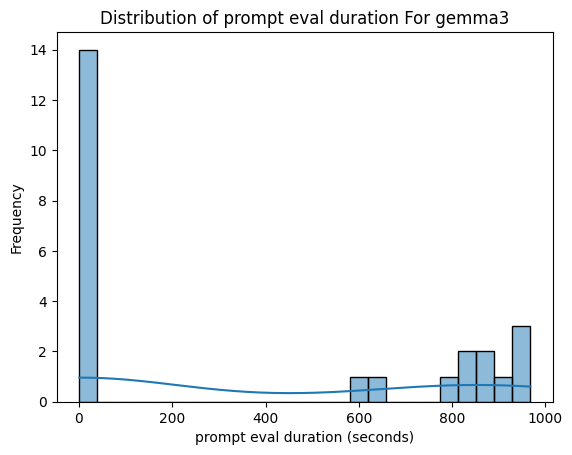

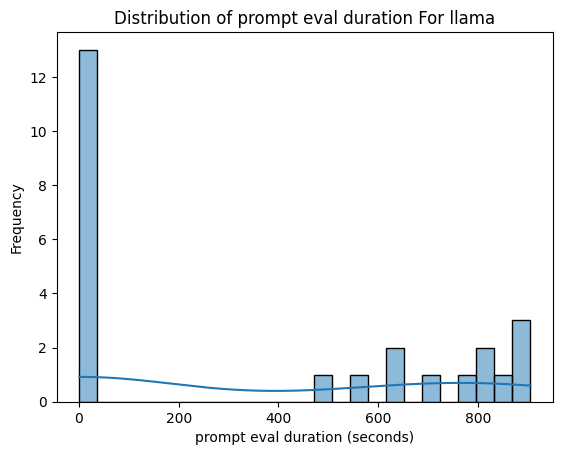

In [23]:
for key in df:

#Histogram of eval rate
    df[key]['prompt eval duration'] = pd.to_numeric(df[key]['prompt eval duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['prompt eval duration'], bins=25, kde=True)
    plt.title("Distribution of prompt eval duration For " + key)
    plt.xlabel("prompt eval duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



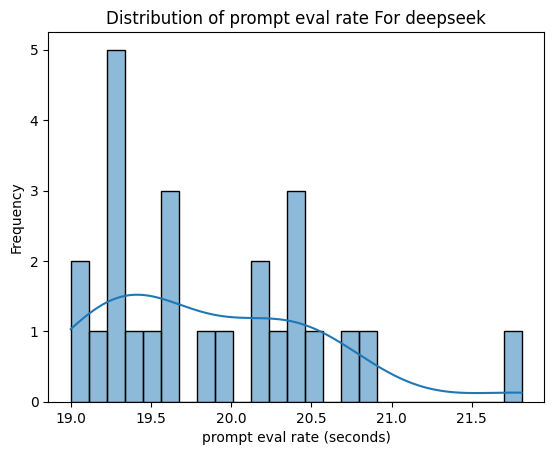

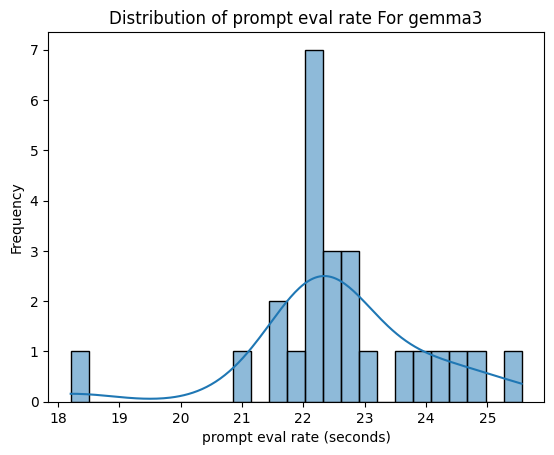

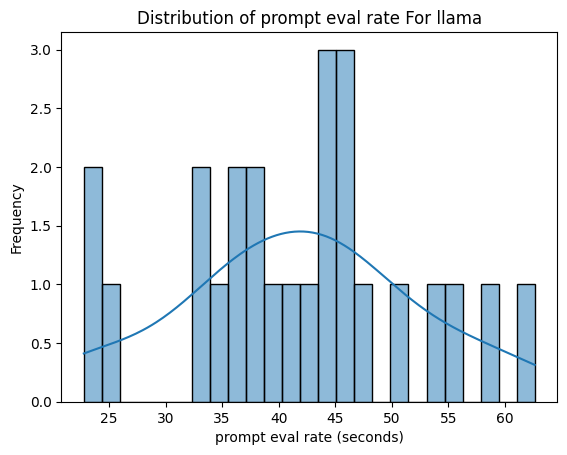

In [24]:
for key in df:

#Histogram of eval rate
    df[key]['prompt eval rate'] = pd.to_numeric(df[key]['prompt eval rate'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['prompt eval rate'], bins=25, kde=True)
    plt.title("Distribution of prompt eval rate For " + key)
    plt.xlabel("prompt eval rate (seconds)")
    plt.ylabel("Frequency")
    plt.show()



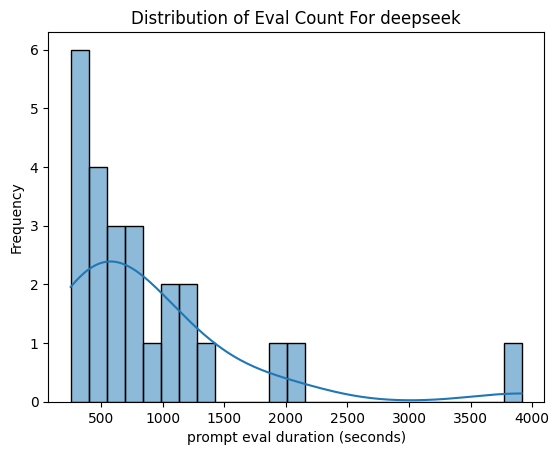

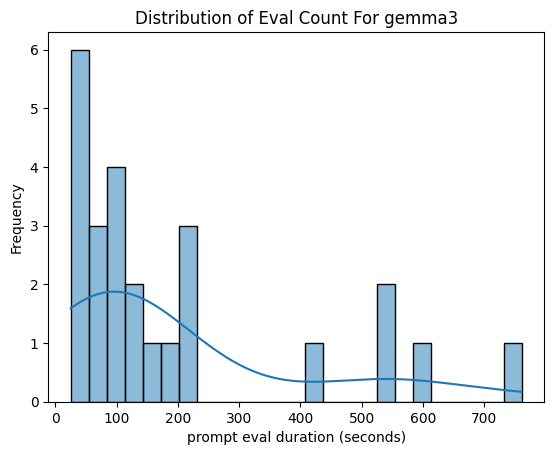

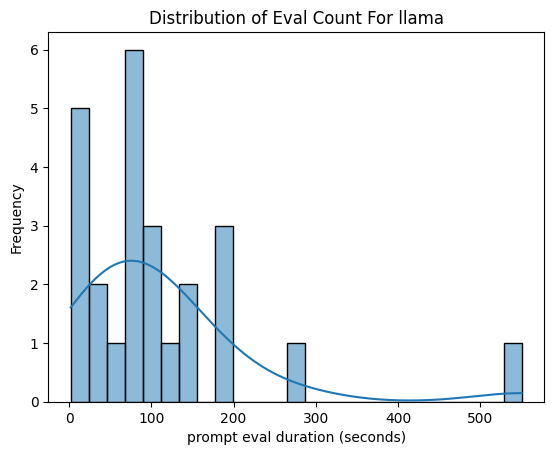

In [25]:
for key in df:

#Histogram of eval rate
    df[key]['eval count'] = pd.to_numeric(df[key]['eval count'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['eval count'], bins=25, kde=True)
    plt.title("Distribution of Eval Count For " + key)
    plt.xlabel("prompt eval duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



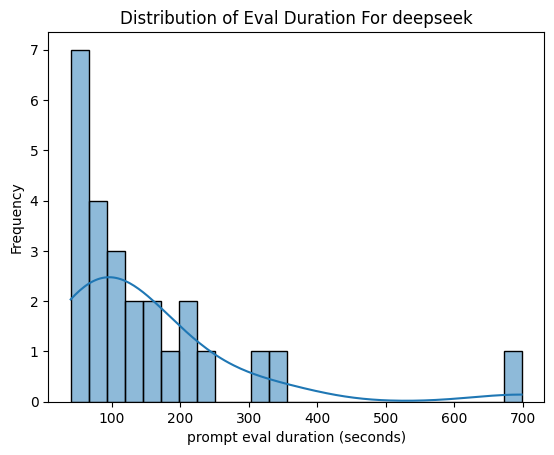

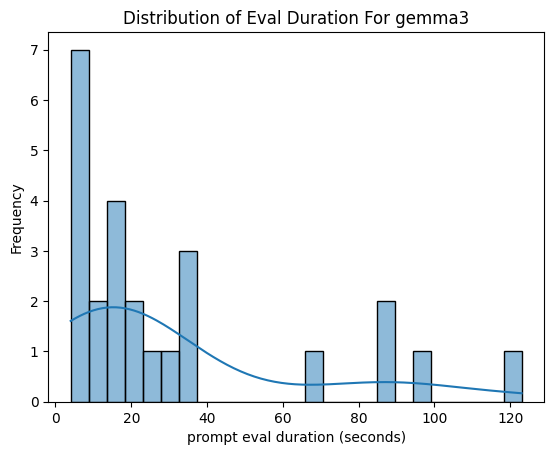

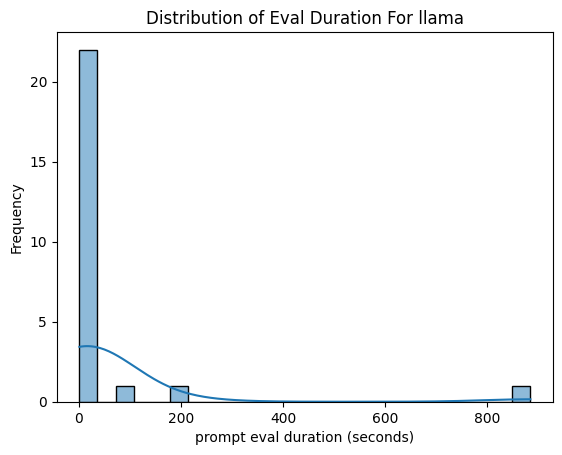

In [26]:
for key in df:

#Histogram of eval rate
    df[key]['eval duration'] = pd.to_numeric(df[key]['eval duration'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['eval duration'], bins=25, kde=True)
    plt.title("Distribution of Eval Duration For " + key)
    plt.xlabel("prompt eval duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()



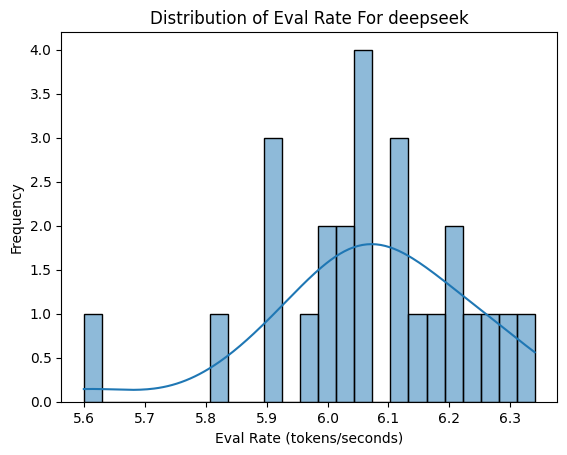

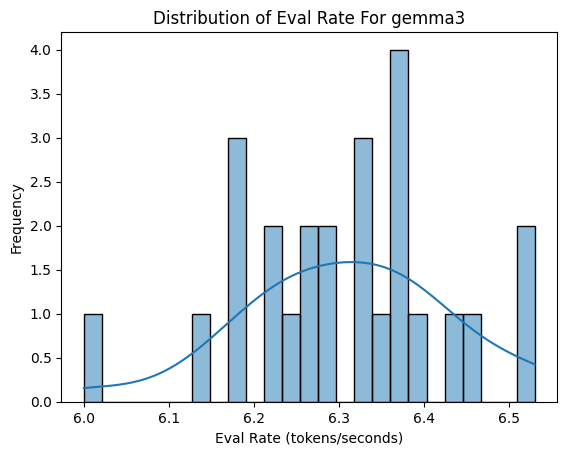

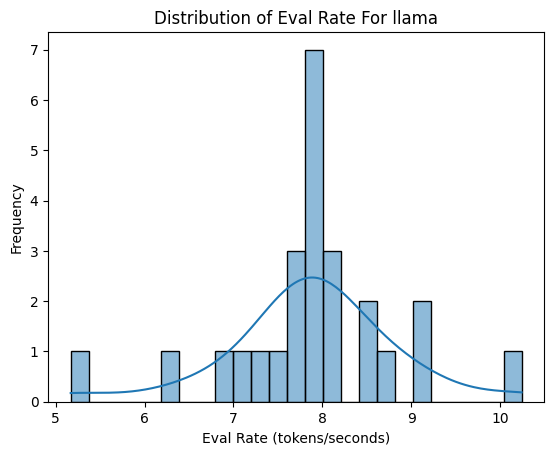

In [18]:
for key in df:

#Histogram of eval rate
    df[key]['eval rate'] = pd.to_numeric(df[key]['eval rate'])  # Convert or set invalids to NaN, likelt means our data is messy
    sns.histplot(df[key]['eval rate'], bins=25, kde=True)
    plt.title("Distribution of Eval Rate For " + key)
    plt.xlabel("Eval Rate (tokens/seconds)")
    plt.ylabel("Frequency")
    plt.show()



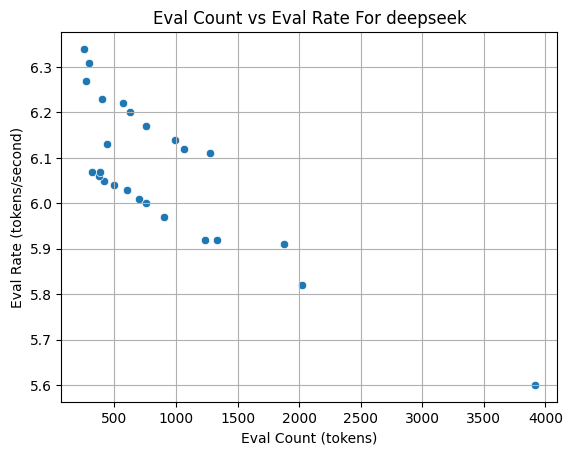

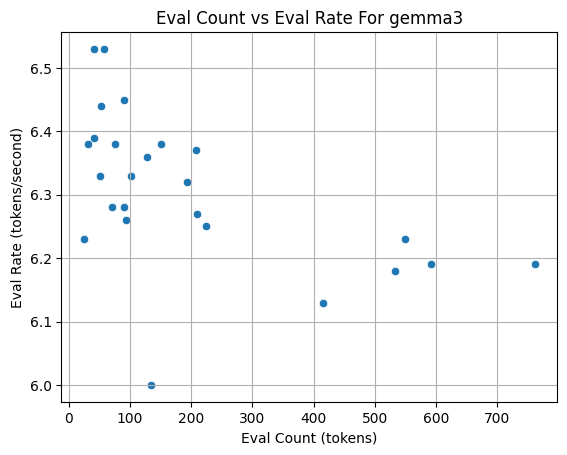

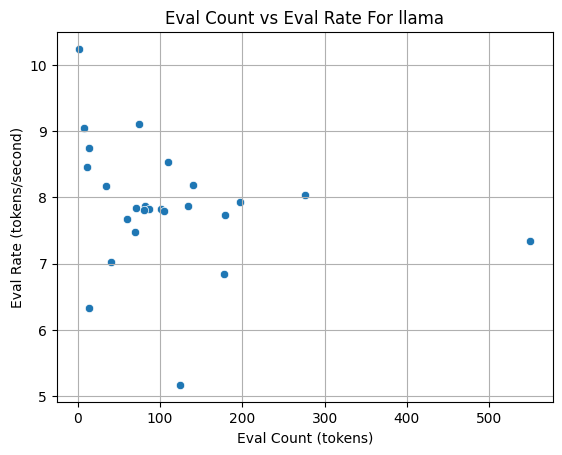

In [29]:
for key in df:
    # Ensure numeric types for both columns
    df[key]['eval count'] = pd.to_numeric(df[key]['eval count'], errors='coerce')
    df[key]['eval rate'] = pd.to_numeric(df[key]['eval rate'], errors='coerce')

    # Scatter plot of eval rate vs load duration
    sns.scatterplot(x=df[key]['eval count'], y=df[key]['eval rate'])
    plt.title("Eval Count vs Eval Rate For " + key)
    plt.xlabel("Eval Count (tokens)")
    plt.ylabel("Eval Rate (tokens/second)")
    plt.grid(True)
    plt.show()


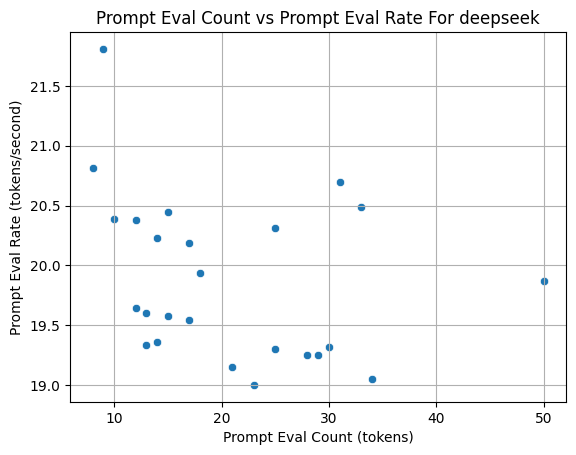

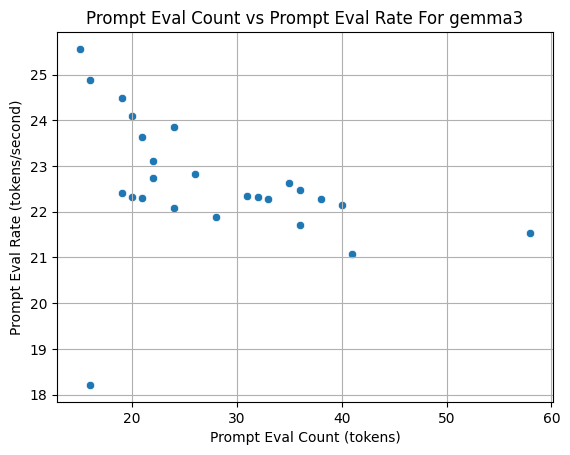

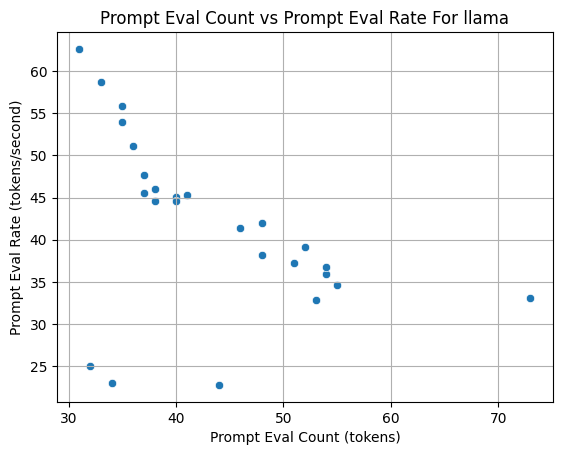

In [31]:
for key in df:
    # Ensure numeric types for both columns
    df[key]['prompt eval count'] = pd.to_numeric(df[key]['prompt eval count'], errors='coerce')
    df[key]['prompt eval rate'] = pd.to_numeric(df[key]['prompt eval rate'], errors='coerce')

    # Scatter plot of eval rate vs load duration
    sns.scatterplot(x=df[key]['prompt eval count'], y=df[key]['prompt eval rate'])
    plt.title("Prompt Eval Count vs Prompt Eval Rate For " + key)
    plt.xlabel("Prompt Eval Count (tokens)")
    plt.ylabel("Prompt Eval Rate (tokens/second)")
    plt.grid(True)
    plt.show()


In [2]:
import re

text = ' 6.34235235s'
pattern = r'\s(\d+m)?(\d+(\.?\d+)?)'
result = re.search(pattern, text)
result.groups()

(None, '6.34235235', '.34235235')